# 1. Dealing with data (Data Wrangling) 

In [1]:
import pandas as pd

In [2]:
registered_users_path = '/Users/tupizz/Desktop/fiap/fiap_credit_analysis/data/clientes_cadastrados.csv'
approved_users_path = '/Users/tupizz/Desktop/fiap/fiap_credit_analysis/data/clientes_aprovados.csv'

In [3]:
registered_users = pd.read_csv(registered_users_path)

In [4]:
registered_users.head()

,ID_Cliente,Genero,Tem_carro,Tem_casa_propria,Qtd_filhos,Rendimento_anual,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Idade,Anos_empregado,Tem_celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_familia
0,5008804,M,Y,Y,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,-21474,-1134,1,0,0,0,Segurança,2.0
3,5008808,F,N,Y,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,-19110,-3051,1,0,1,1,Vendas,1.0
4,5008809,F,N,Y,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,-19110,-3051,1,0,1,1,Vendas,1.0


In [5]:
registered_users.shape

(438557, 18)

In [6]:
registered_users['ID_Cliente'].value_counts()

ID_Cliente
7137299    2
7702238    2
7282535    2
7243768    2
7050948    2
          ..
5690727    1
6621262    1
6621261    1
6621260    1
6842885    1
Name: count, Length: 438510, dtype: int64

We have duplicated values in the database so we need to clean that up right now :)

In [7]:
registered_users[registered_users['ID_Cliente'].duplicated(keep=False)].shape

(94, 18)

We have 94 duplicated values in the database. Let's remove them.

In [8]:
repeated_items_df = registered_users[registered_users['ID_Cliente'].duplicated(keep=False)]['ID_Cliente']
registered_users_cleaned = registered_users.drop(repeated_items_df.index)
registered_users_cleaned.shape

(438463, 18)

In [9]:
registered_users_cleaned.isnull().sum()

ID_Cliente                    0
Genero                        0
Tem_carro                     0
Tem_casa_propria              0
Qtd_filhos                    0
Rendimento_anual              0
Categoria_de_renda            0
Grau_escolaridade             0
Estado_civil                  0
Moradia                       0
Idade                         0
Anos_empregado                0
Tem_celular                   0
Tem_telefone_trabalho         0
Tem_telefone_fixo             0
Tem_email                     0
Ocupacao                 134177
Tamanho_familia               0
dtype: int64

In [10]:
registered_users_cleaned['Ocupacao'].unique()

array([nan, 'Segurança', 'Vendas', 'Contabilidade', 'Construção Civil',
       'Gerência', 'Motorista', 'Equipe principal', 'Alta tecnologia',
       'Limpeza', 'Serviço privado', 'Cozinha', 'Baixa qualificação',
       'Medicina', 'Secretariado', 'Garçom', 'RH', 'Corretor imobiliário',
       'TI'], dtype=object)

We're going to replace the missing values NaN with "Others" in the column "Ocupacao"

In [11]:
registered_users_cleaned['Ocupacao'] = registered_users_cleaned['Ocupacao'].fillna('Outro')

In [12]:
registered_users_cleaned['Ocupacao'].unique()

array(['Outro', 'Segurança', 'Vendas', 'Contabilidade',
       'Construção Civil', 'Gerência', 'Motorista', 'Equipe principal',
       'Alta tecnologia', 'Limpeza', 'Serviço privado', 'Cozinha',
       'Baixa qualificação', 'Medicina', 'Secretariado', 'Garçom', 'RH',
       'Corretor imobiliário', 'TI'], dtype=object)

Now let's analyze how many different values we have in each column

In [13]:
registered_users_cleaned.nunique()

ID_Cliente               438463
Genero                        2
Tem_carro                     2
Tem_casa_propria              2
Qtd_filhos                   12
Rendimento_anual            866
Categoria_de_renda            5
Grau_escolaridade             5
Estado_civil                  5
Moradia                       6
Idade                     16379
Anos_empregado             9406
Tem_celular                   1
Tem_telefone_trabalho         2
Tem_telefone_fixo             2
Tem_email                     2
Ocupacao                     19
Tamanho_familia              13
dtype: int64

Thinking about bias in the model, we're going to remove the columns "Genero" because we shouldn't take in consideration the sex of the person in the credit analysis.

In [14]:
registered_users_cleaned.drop(columns=['Genero', 'Tem_celular'], inplace=True)
registered_users_cleaned

,ID_Cliente,Tem_carro,Tem_casa_propria,Qtd_filhos,Rendimento_anual,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Idade,Anos_empregado,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_familia
0,5008804,Y,Y,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,0,0,Outro,2.0
1,5008805,Y,Y,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,0,0,Outro,2.0
2,5008806,Y,Y,0,112500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,-21474,-1134,0,0,0,Segurança,2.0
3,5008808,N,Y,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,-19110,-3051,0,1,1,Vendas,1.0
4,5008809,N,Y,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,-19110,-3051,0,1,1,Vendas,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,N,Y,0,135000.0,Pensionista,Ensino médio,Divorciado,Casa/apartamento próprio,-22717,365243,0,0,0,Outro,1.0
438553,6840222,N,N,0,103500.0,Empregado,Ensino médio,Solteiro,Casa/apartamento próprio,-15939,-3007,0,0,0,Construção Civil,1.0
438554,6841878,N,N,0,54000.0,Associado comercial,Ensino superior,Solteiro,Mora com os pais,-8169,-372,1,0,0,Vendas,1.0
438555,6842765,N,Y,0,72000.0,Pensionista,Ensino médio,Casado,Casa/apartamento próprio,-21673,365243,0,0,0,Outro,2.0


# Clean up boolean columns

In [15]:
registered_users_cleaned['Tem_carro'].unique()

array(['Y', 'N'], dtype=object)

In [16]:
registered_users_cleaned['Tem_casa_propria'].unique()

array(['Y', 'N'], dtype=object)

In [17]:
registered_users_cleaned['Tem_telefone_trabalho'].unique()


array([1, 0])

In [18]:
registered_users_cleaned['Tem_telefone_fixo'].unique()


array([0, 1])

In [19]:
registered_users_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438463 entries, 0 to 438556
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             438463 non-null  int64  
 1   Tem_carro              438463 non-null  object 
 2   Tem_casa_propria       438463 non-null  object 
 3   Qtd_filhos             438463 non-null  int64  
 4   Rendimento_anual       438463 non-null  float64
 5   Categoria_de_renda     438463 non-null  object 
 6   Grau_escolaridade      438463 non-null  object 
 7   Estado_civil           438463 non-null  object 
 8   Moradia                438463 non-null  object 
 9   Idade                  438463 non-null  int64  
 10  Anos_empregado         438463 non-null  int64  
 11  Tem_telefone_trabalho  438463 non-null  int64  
 12  Tem_telefone_fixo      438463 non-null  int64  
 13  Tem_email              438463 non-null  int64  
 14  Ocupacao               438463 non-null  o

In [20]:
registered_users_cleaned['Tem_carro'] =  registered_users_cleaned['Tem_carro'].replace(['Y', 'N'], [1, 0])
registered_users_cleaned['Tem_casa_propria'] =  registered_users_cleaned['Tem_casa_propria'].replace(['Y', 'N'], [1, 0])
registered_users_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438463 entries, 0 to 438556
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             438463 non-null  int64  
 1   Tem_carro              438463 non-null  int64  
 2   Tem_casa_propria       438463 non-null  int64  
 3   Qtd_filhos             438463 non-null  int64  
 4   Rendimento_anual       438463 non-null  float64
 5   Categoria_de_renda     438463 non-null  object 
 6   Grau_escolaridade      438463 non-null  object 
 7   Estado_civil           438463 non-null  object 
 8   Moradia                438463 non-null  object 
 9   Idade                  438463 non-null  int64  
 10  Anos_empregado         438463 non-null  int64  
 11  Tem_telefone_trabalho  438463 non-null  int64  
 12  Tem_telefone_fixo      438463 non-null  int64  
 13  Tem_email              438463 non-null  int64  
 14  Ocupacao               438463 non-null  o

/var/folders/yl/kxzm_dt540l7tgjzxj_d_zj00000gn/T/ipykernel_81077/3624626482.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  registered_users_cleaned['Tem_carro'] =  registered_users_cleaned['Tem_carro'].replace(['Y', 'N'], [1, 0])
/var/folders/yl/kxzm_dt540l7tgjzxj_d_zj00000gn/T/ipykernel_81077/3624626482.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  registered_users_cleaned['Tem_casa_propria'] =  registered_users_cleaned['Tem_casa_propria'].replace(['Y', 'N'], [1, 0])


In [21]:
registered_users_cleaned['Idade'] = - registered_users_cleaned['Idade'] / 365.2425
registered_users_cleaned['Idade']

0         32.868574
1         32.868574
2         58.793815
3         52.321403
4         52.321403
            ...    
438552    62.197033
438553    43.639500
438554    22.365962
438555    59.338659
438556    51.631450
Name: Idade, Length: 438463, dtype: float64

In [22]:
registered_users_cleaned['Anos_empregado'] = - registered_users_cleaned['Anos_empregado'] / 365.2425
registered_users_cleaned['Anos_empregado']

0           12.435574
1           12.435574
2            3.104787
3            8.353354
4            8.353354
             ...     
438552   -1000.001369
438553       8.232886
438554       1.018501
438555   -1000.001369
438556       3.288226
Name: Anos_empregado, Length: 438463, dtype: float64

In [23]:
registered_users_cleaned.loc[registered_users_cleaned['Anos_empregado'] < 0, 'Anos_empregado'] = 0

In [24]:
registered_users_cleaned['Anos_empregado']

0         12.435574
1         12.435574
2          3.104787
3          8.353354
4          8.353354
            ...    
438552     0.000000
438553     8.232886
438554     1.018501
438555     0.000000
438556     3.288226
Name: Anos_empregado, Length: 438463, dtype: float64

# Correlation between values

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
registered_users_cleaned.head()

,ID_Cliente,Tem_carro,Tem_casa_propria,Qtd_filhos,Rendimento_anual,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Idade,Anos_empregado,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_familia
0,5008804,1,1,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,32.868574,12.435574,1,0,0,Outro,2.0
1,5008805,1,1,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,32.868574,12.435574,1,0,0,Outro,2.0
2,5008806,1,1,0,112500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,58.793815,3.104787,0,0,0,Segurança,2.0
3,5008808,0,1,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,52.321403,8.353354,0,1,1,Vendas,1.0
4,5008809,0,1,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,52.321403,8.353354,0,1,1,Vendas,1.0


In [27]:
registered_users_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438463 entries, 0 to 438556
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             438463 non-null  int64  
 1   Tem_carro              438463 non-null  int64  
 2   Tem_casa_propria       438463 non-null  int64  
 3   Qtd_filhos             438463 non-null  int64  
 4   Rendimento_anual       438463 non-null  float64
 5   Categoria_de_renda     438463 non-null  object 
 6   Grau_escolaridade      438463 non-null  object 
 7   Estado_civil           438463 non-null  object 
 8   Moradia                438463 non-null  object 
 9   Idade                  438463 non-null  float64
 10  Anos_empregado         438463 non-null  float64
 11  Tem_telefone_trabalho  438463 non-null  int64  
 12  Tem_telefone_fixo      438463 non-null  int64  
 13  Tem_email              438463 non-null  int64  
 14  Ocupacao               438463 non-null  o

<Axes: >

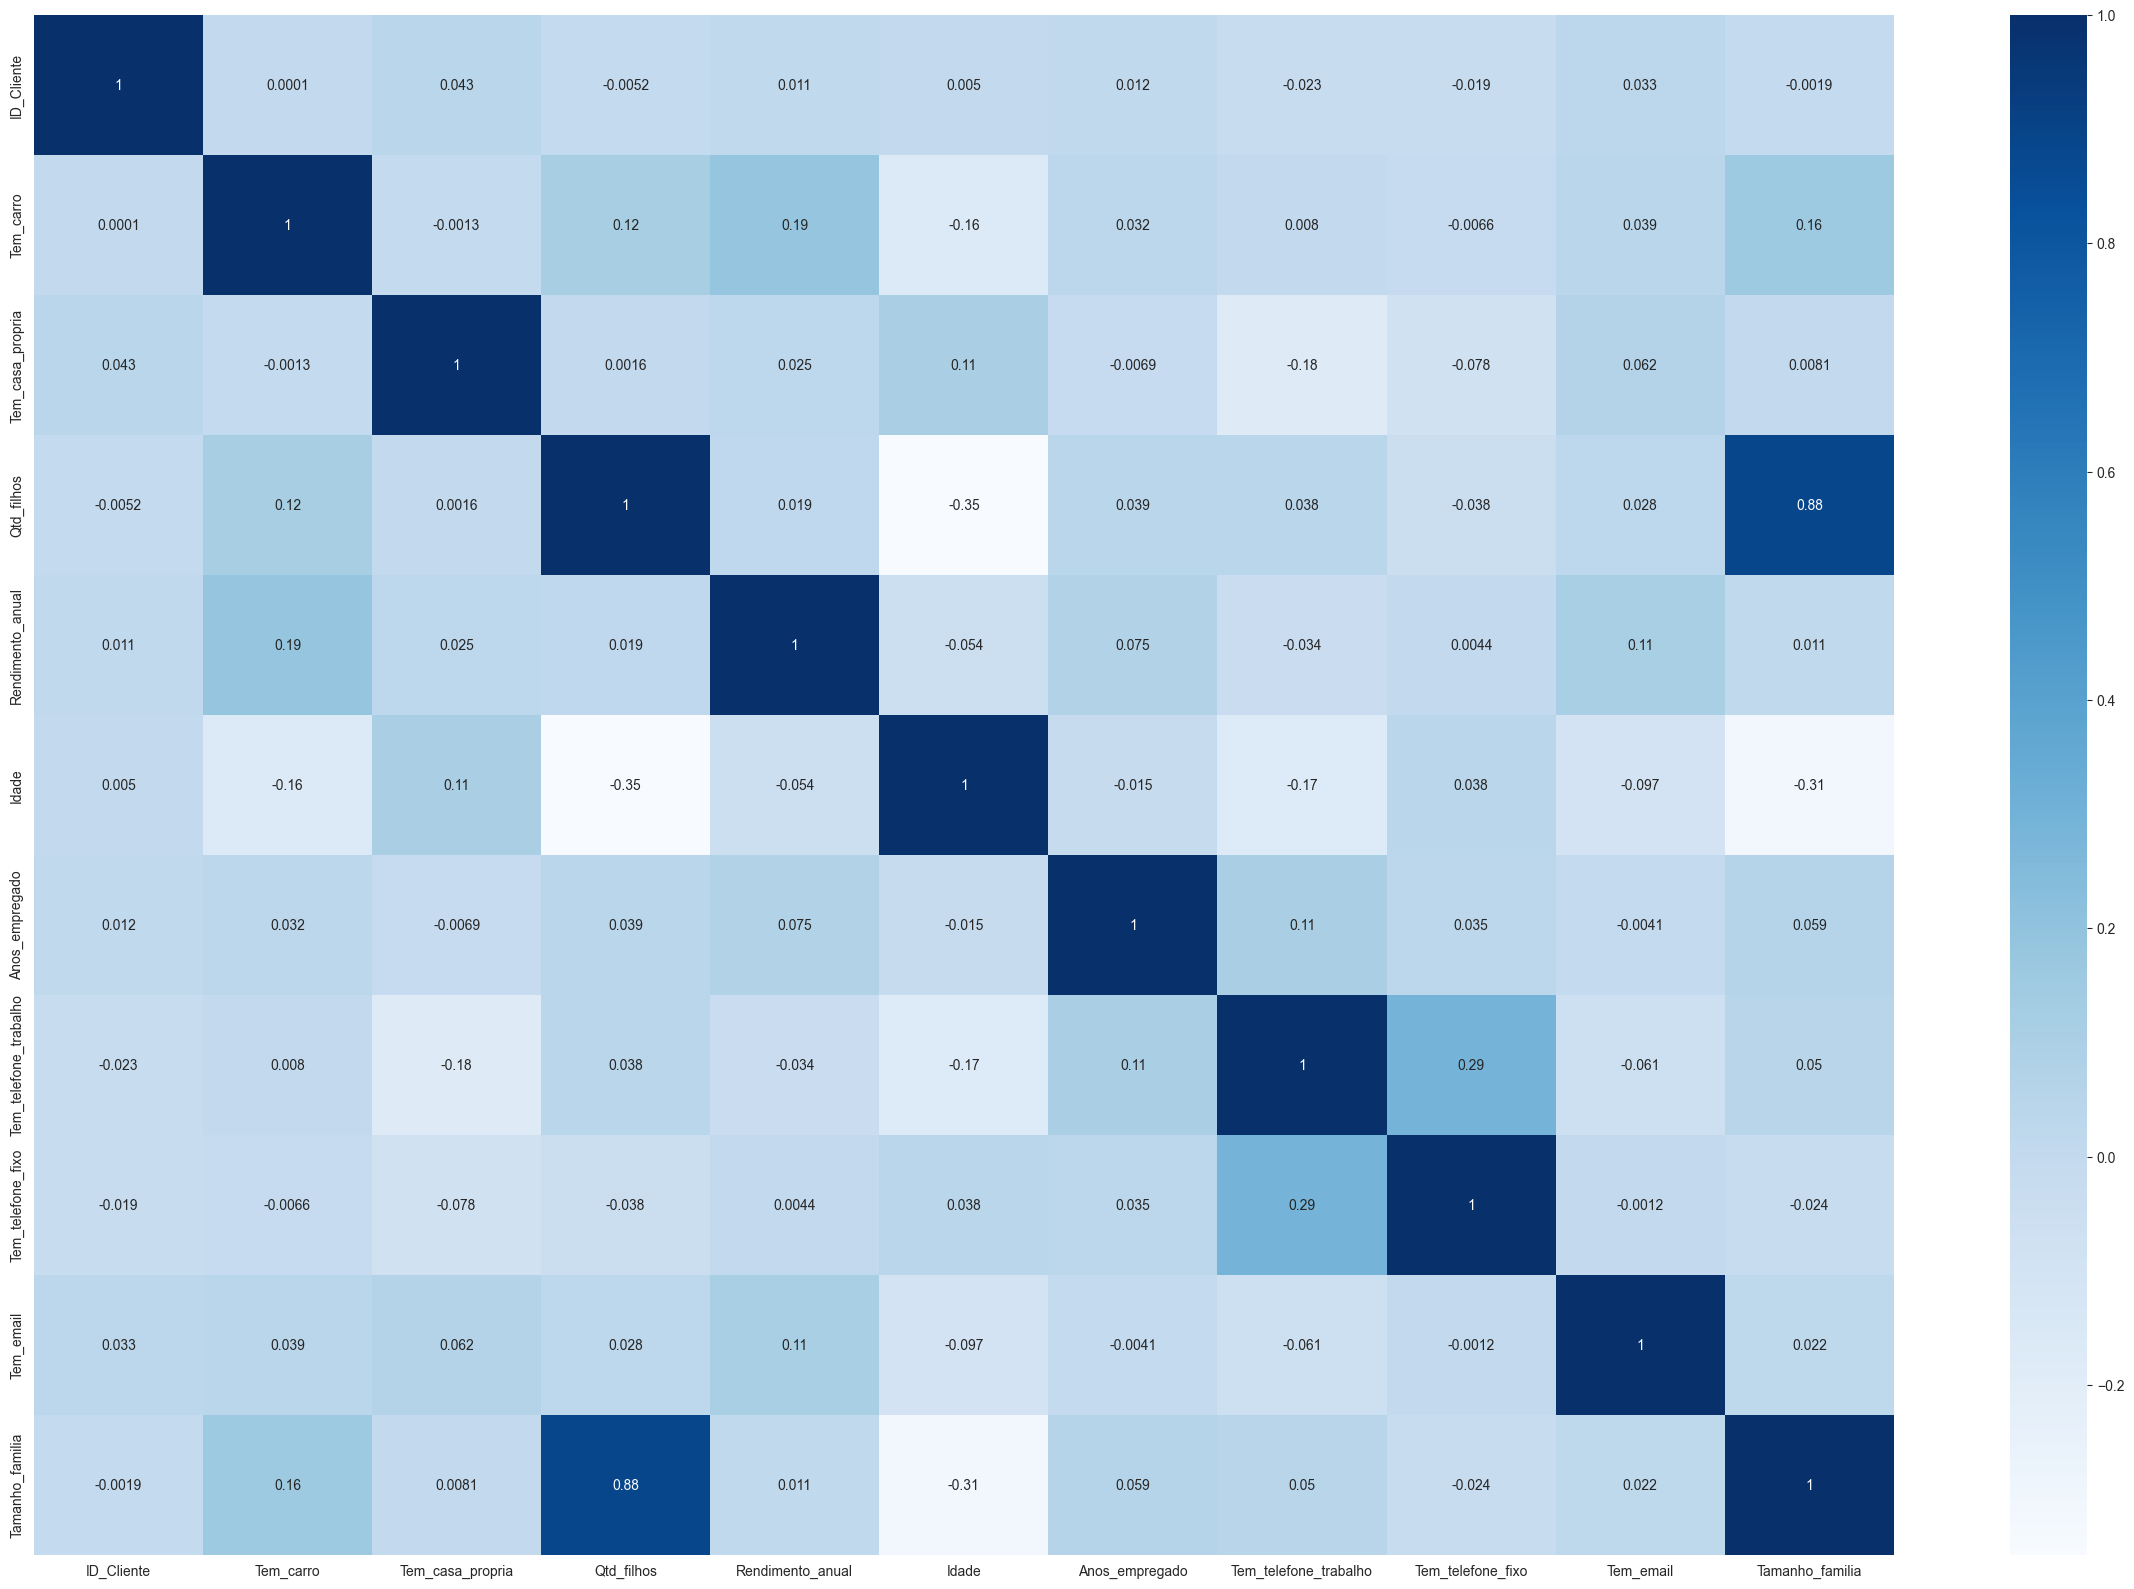

In [28]:
# filter non numeric columns
registered_users_cleaned_numeric_cols = registered_users_cleaned.select_dtypes(include=['float64', 'int64'])

correlation = registered_users_cleaned_numeric_cols.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(correlation, cmap='Blues', annot=True)

From the correlation matrix we can undertand that we have strong correlation between "Qtd_Filhos" with "Tamanho_Familia"

In [29]:
registered_users_cleaned.drop(['Qtd_filhos'], axis=1, inplace=True)

In [30]:
# ORGANIZING THE DATA
registered_users_cleaned = registered_users_cleaned[['ID_Cliente', 'Tem_carro', 'Tem_casa_propria', 
                                           'Tem_telefone_trabalho', 'Tem_telefone_fixo', 'Tem_email',
                                           'Tamanho_familia', 'Rendimento_anual', 'Idade', 'Anos_empregado',
                                           'Categoria_de_renda', 'Grau_escolaridade', 'Estado_civil',
                                           'Moradia', 'Ocupacao']]
registered_users_cleaned.head()

,ID_Cliente,Tem_carro,Tem_casa_propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Ocupacao
0,5008804,1,1,1,0,0,2.0,427500.0,32.868574,12.435574,Empregado,Ensino superior,União-estável,Apartamento alugado,Outro
1,5008805,1,1,1,0,0,2.0,427500.0,32.868574,12.435574,Empregado,Ensino superior,União-estável,Apartamento alugado,Outro
2,5008806,1,1,0,0,0,2.0,112500.0,58.793815,3.104787,Empregado,Ensino médio,Casado,Casa/apartamento próprio,Segurança
3,5008808,0,1,0,1,1,1.0,270000.0,52.321403,8.353354,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,Vendas
4,5008809,0,1,0,1,1,1.0,270000.0,52.321403,8.353354,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,Vendas


In [31]:
quantitative_columns = ['Tamanho_familia', 'Rendimento_anual', 'Idade', 'Anos_empregado']
registered_users_cleaned[quantitative_columns].describe()

,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado
count,438463.000000,4.384630e+05,438463.000000,438463.000000
mean,2.194461,1.875220e+05,43.800857,5.948371
std,0.897194,1.100832e+05,11.458262,6.564112
min,1.000000,2.610000e+04,20.504186,0.000000
25%,2.000000,1.215000e+05,34.262168,1.015763
50%,2.000000,1.611000e+05,42.793487,4.019247
75%,3.000000,2.250000e+05,53.345380,8.495725
max,20.000000,6.750000e+06,68.997994,47.998248


# Analyzing the categorical columns

In [32]:
registered_users_cleaned['Categoria_de_renda'].value_counts(normalize = True) * 100

Categoria_de_renda
Empregado              51.557144
Associado comercial    22.972520
Pensionista            17.214223
Servidor público        8.252236
Estudante               0.003877
Name: proportion, dtype: float64

In [33]:
registered_users_cleaned['Grau_escolaridade'].value_counts(normalize = True) * 100

Grau_escolaridade
Ensino médio                  68.821314
Ensino superior               26.797928
Ensino superior incompleto     3.385690
Ensino fundamental             0.923909
Pós-graduação                  0.071158
Name: proportion, dtype: float64

In [34]:
registered_users_cleaned['Estado_civil'].value_counts(normalize = True) * 100

Estado_civil
Casado           68.367912
Solteiro         12.601976
União-estável     8.329323
Divorciado        6.214663
Viúvo             4.486125
Name: proportion, dtype: float64

In [35]:
registered_users_cleaned['Moradia'].value_counts(normalize = True) * 100


Moradia
Casa/apartamento próprio    89.801876
Mora com os pais             4.349740
Habitação pública            3.241094
Apartamento alugado          1.362259
Apartamento comercial        0.894032
Cooperativa habitacional     0.350999
Name: proportion, dtype: float64

In [36]:
registered_users_cleaned['Ocupacao'].value_counts(normalize = True) * 100

Ocupacao
Outro                   30.601670
Construção Civil        17.840730
Equipe principal         9.805388
Vendas                   9.371828
Gerência                 8.091219
Motorista                5.949191
Alta tecnologia          3.941724
Contabilidade            3.644549
Medicina                 3.083042
Cozinha                  1.841432
Segurança                1.822959
Limpeza                  1.332610
Serviço privado          0.787980
Baixa qualificação       0.488069
Secretariado             0.466174
Garçom                   0.379736
Corretor imobiliário     0.237420
RH                       0.176526
TI                       0.137754
Name: proportion, dtype: float64

In [37]:
import matplotlib as mpl
#Configurações dos gráficos:
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (10,6)

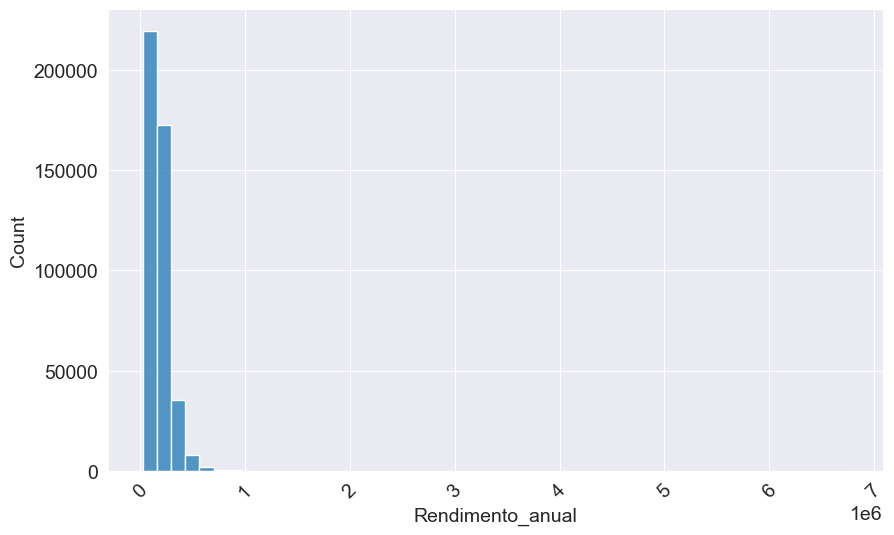

In [38]:
sns.histplot(data=registered_users_cleaned, x='Rendimento_anual', bins=50) 
plt.xticks(rotation=45)
plt.show()

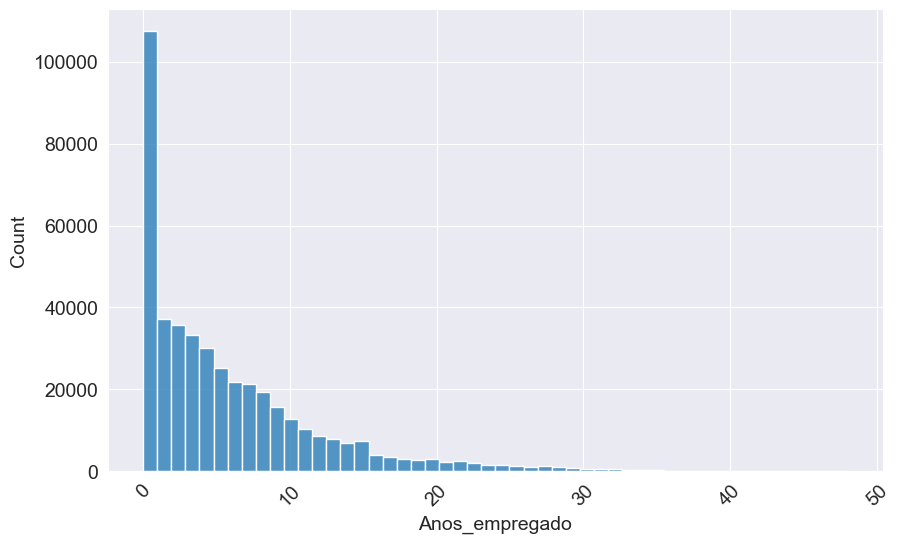

In [39]:
sns.histplot(data=registered_users_cleaned, x='Anos_empregado', bins=50) 
plt.xticks(rotation=45)
plt.show()

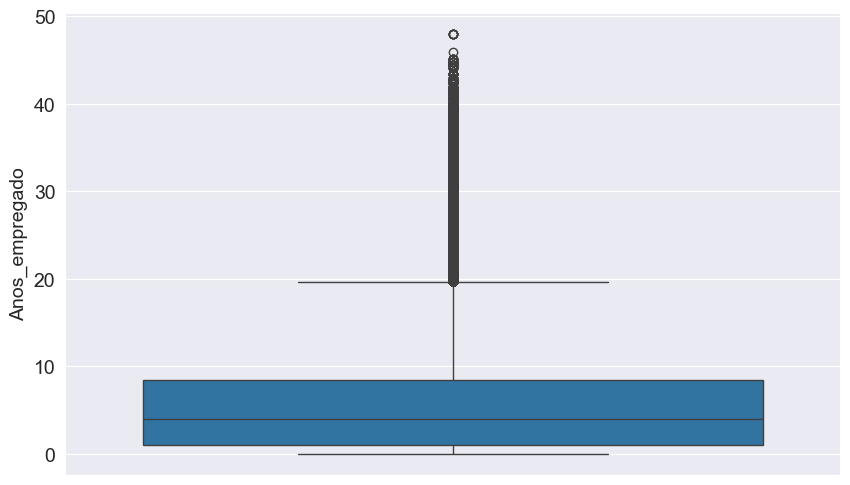

In [40]:
sns.boxplot(data=registered_users_cleaned, y='Anos_empregado') 
plt.xticks(rotation=45)
plt.show()

# Creating target value

In [41]:
approved_users = pd.read_csv(approved_users_path)
approved_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID_Cliente      1048575 non-null  int64 
 1   Mes_referencia  1048575 non-null  int64 
 2   Faixa_atraso    1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [42]:
approved_users.head()

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias
4,5001712,0,pagamento realizado


In [43]:
approved_users.query('ID_Cliente == 5001712')

,ID_Cliente,Mes_referencia,Faixa_atraso
4,5001712,0,pagamento realizado
5,5001712,-1,pagamento realizado
6,5001712,-2,pagamento realizado
7,5001712,-3,pagamento realizado
8,5001712,-4,pagamento realizado
9,5001712,-5,pagamento realizado
10,5001712,-6,pagamento realizado
11,5001712,-7,pagamento realizado
12,5001712,-8,pagamento realizado
13,5001712,-9,1-29 dias


In [44]:
approved_users.query('ID_Cliente == 5001711')

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias


### Understanding more about the column "Faixa_atraso"

In [45]:
approved_users.Faixa_atraso.value_counts()

Faixa_atraso
pagamento realizado    442031
1-29 dias              383120
nenhum empréstimo      209230
30-59 dias              11090
>150 dias                1693
60-89 dias                868
90-119 dias               320
120-149 dias              223
Name: count, dtype: int64

### Our target would be if a person is a good payer or not, so we should create a new column that represents that

In [46]:
df_credit_register_grouped_by_id = approved_users.groupby('ID_Cliente');
openening_credit = df_credit_register_grouped_by_id.apply(lambda x: min(x['Mes_referencia']))
openening_credit.name = 'Openening_credit_date'
openening_credit

/var/folders/yl/kxzm_dt540l7tgjzxj_d_zj00000gn/T/ipykernel_81077/4120868573.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  openening_credit = df_credit_register_grouped_by_id.apply(lambda x: min(x['Mes_referencia']))


ID_Cliente
5001711    -3
5001712   -18
5001713   -21
5001714   -14
5001715   -59
           ..
5150482   -28
5150483   -17
5150484   -12
5150485    -1
5150487   -29
Name: Openening_credit_date, Length: 45985, dtype: int64

Now we should merge this new data frame with our approved_users data frame

In [47]:
df_approved_clients = approved_users.merge(openening_credit, on='ID_Cliente')
df_approved_clients.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Openening_credit_date
0,5001711,0,nenhum empréstimo,-3
1,5001711,-1,1-29 dias,-3
2,5001711,-2,1-29 dias,-3
3,5001711,-3,1-29 dias,-3
4,5001712,0,pagamento realizado,-18


Let's do the same to the last month of the credit taken from user

In [48]:
closing_date_credit = df_credit_register_grouped_by_id.apply(lambda x: max(x['Mes_referencia']))
closing_date_credit.name = 'Closing_credit_date'
closing_date_credit

/var/folders/yl/kxzm_dt540l7tgjzxj_d_zj00000gn/T/ipykernel_81077/1677608226.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  closing_date_credit = df_credit_register_grouped_by_id.apply(lambda x: max(x['Mes_referencia']))


ID_Cliente
5001711     0
5001712     0
5001713     0
5001714     0
5001715     0
           ..
5150482   -11
5150483     0
5150484     0
5150485     0
5150487     0
Name: Closing_credit_date, Length: 45985, dtype: int64

In [49]:
df_approved_clients = df_approved_clients.merge(closing_date_credit, on='ID_Cliente')
df_approved_clients.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Openening_credit_date,Closing_credit_date
0,5001711,0,nenhum empréstimo,-3,0
1,5001711,-1,1-29 dias,-3,0
2,5001711,-2,1-29 dias,-3,0
3,5001711,-3,1-29 dias,-3,0
4,5001712,0,pagamento realizado,-18,0


In [50]:
df_approved_clients['Credit_window'] = df_approved_clients['Closing_credit_date'] - df_approved_clients['Openening_credit_date']
df_approved_clients.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Openening_credit_date,Closing_credit_date,Credit_window
0,5001711,0,nenhum empréstimo,-3,0,3
1,5001711,-1,1-29 dias,-3,0,3
2,5001711,-2,1-29 dias,-3,0,3
3,5001711,-3,1-29 dias,-3,0,3
4,5001712,0,pagamento realizado,-18,0,18


### MOB - Months on Book

The MOB is the number of months that the user has been a client of the company

In [51]:
df_approved_clients['MOB'] = df_approved_clients['Mes_referencia'] - df_approved_clients['Openening_credit_date']
df_approved_clients.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Openening_credit_date,Closing_credit_date,Credit_window,MOB
0,5001711,0,nenhum empréstimo,-3,0,3,3
1,5001711,-1,1-29 dias,-3,0,3,2
2,5001711,-2,1-29 dias,-3,0,3,1
3,5001711,-3,1-29 dias,-3,0,3,0
4,5001712,0,pagamento realizado,-18,0,18,18


Let's make now the Faixa_atraso as dictionary

In [52]:
df_approved_clients['Faixa_atraso'].unique()

array(['nenhum empréstimo', '1-29 dias', 'pagamento realizado',
       '30-59 dias', '60-89 dias', '90-119 dias', '120-149 dias',
       '>150 dias'], dtype=object)

In [53]:
dict_faixa_atraso_ind = {
    'nenhum empréstimo': 0,
    'pagamento realizado': 1,
    '1-29 dias': 2,
    '30-59 dias': 3,
    '60-89 dias': 4,
    '90-119 dias': 5,
    '120-149 dias': 6,
    '>150 dias': 7
}

df_approved_clients['Faixa_atraso_ind'] = df_approved_clients['Faixa_atraso'].map(dict_faixa_atraso_ind)
df_approved_clients.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Openening_credit_date,Closing_credit_date,Credit_window,MOB,Faixa_atraso_ind
0,5001711,0,nenhum empréstimo,-3,0,3,3,0
1,5001711,-1,1-29 dias,-3,0,3,2,2
2,5001711,-2,1-29 dias,-3,0,3,1,2
3,5001711,-3,1-29 dias,-3,0,3,0,2
4,5001712,0,pagamento realizado,-18,0,18,18,1


### Target column

Now we should create a new column that represents if the user is a good payer or not 

In [54]:
df_approved_clients['Is_Bad_payer'] = df_approved_clients.apply(lambda x: 1 if x['Faixa_atraso_ind'] > 3 else 0, axis=1)
df_approved_clients.head(10)

,ID_Cliente,Mes_referencia,Faixa_atraso,Openening_credit_date,Closing_credit_date,Credit_window,MOB,Faixa_atraso_ind,Is_Bad_payer
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0
2,5001711,-2,1-29 dias,-3,0,3,1,2,0
3,5001711,-3,1-29 dias,-3,0,3,0,2,0
4,5001712,0,pagamento realizado,-18,0,18,18,1,0
5,5001712,-1,pagamento realizado,-18,0,18,17,1,0
6,5001712,-2,pagamento realizado,-18,0,18,16,1,0
7,5001712,-3,pagamento realizado,-18,0,18,15,1,0
8,5001712,-4,pagamento realizado,-18,0,18,14,1,0
9,5001712,-5,pagamento realizado,-18,0,18,13,1,0


So far we have a list of rows for the same client, as we can see above.
Ideally we should have only one row for each client, so we should group by the ID_Cliente and take the mean of the column "Is_Bad_payer"

In [55]:
df_credit_register_id = df_approved_clients[['ID_Cliente', 'Openening_credit_date', 'Closing_credit_date', 'Credit_window']].groupby('ID_Cliente').apply(lambda x: x.iloc[0]).reset_index(drop=True)

df_credit_register_id.head()

/var/folders/yl/kxzm_dt540l7tgjzxj_d_zj00000gn/T/ipykernel_81077/905523074.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_credit_register_id = df_approved_clients[['ID_Cliente', 'Openening_credit_date', 'Closing_credit_date', 'Credit_window']].groupby('ID_Cliente').apply(lambda x: x.iloc[0]).reset_index(drop=True)


,ID_Cliente,Openening_credit_date,Closing_credit_date,Credit_window
0,5001711,-3,0,3
1,5001712,-18,0,18
2,5001713,-21,0,21
3,5001714,-14,0,14
4,5001715,-59,0,59


### How many client did we had in a Openining (Abertura de contas)?

In [56]:
df_clients_by_opening = df_credit_register_id.groupby('Openening_credit_date').apply(lambda x: x['ID_Cliente'].count()).reset_index()
df_clients_by_opening.columns = ['Opening', 'Qtd_clients']
df_clients_by_opening

/var/folders/yl/kxzm_dt540l7tgjzxj_d_zj00000gn/T/ipykernel_81077/339852994.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_clients_by_opening = df_credit_register_id.groupby('Openening_credit_date').apply(lambda x: x['ID_Cliente'].count()).reset_index()


,Opening,Qtd_clients
0,-60,415
1,-59,406
2,-58,440
3,-57,400
4,-56,470
...,...,...
56,-4,874
57,-3,919
58,-2,771
59,-1,686


In [57]:
df_approved_clients.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Openening_credit_date,Closing_credit_date,Credit_window,MOB,Faixa_atraso_ind,Is_Bad_payer
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0
2,5001711,-2,1-29 dias,-3,0,3,1,2,0
3,5001711,-3,1-29 dias,-3,0,3,0,2,0
4,5001712,0,pagamento realizado,-18,0,18,18,1,0


In [58]:
df_vintage = df_approved_clients.groupby(['Openening_credit_date', 'MOB']).apply(lambda x: x['ID_Cliente'].count()).reset_index()
df_vintage.columns = ['Opening', 'MOB', 'Qtd_clients']
df_vintage

/var/folders/yl/kxzm_dt540l7tgjzxj_d_zj00000gn/T/ipykernel_81077/4054440523.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_vintage = df_approved_clients.groupby(['Openening_credit_date', 'MOB']).apply(lambda x: x['ID_Cliente'].count()).reset_index()


,Opening,MOB,Qtd_clients
0,-60,0,415
1,-60,1,414
2,-60,2,410
3,-60,3,408
4,-60,4,403
...,...,...,...
1886,-2,1,770
1887,-2,2,750
1888,-1,0,686
1889,-1,1,682


In [59]:
df_vintage = pd.merge(df_vintage[['Opening', 'MOB']], df_clients_by_opening, on='Opening', how='left')
df_vintage.head()

,Opening,MOB,Qtd_clients
0,-60,0,415
1,-60,1,415
2,-60,2,415
3,-60,3,415
4,-60,4,415


In [60]:
df_approved_clients_cleaned = df_approved_clients.query('Credit_window >= 12')
df_approved_clients_cleaned

,ID_Cliente,Mes_referencia,Faixa_atraso,Openening_credit_date,Closing_credit_date,Credit_window,MOB,Faixa_atraso_ind,Is_Bad_payer
4,5001712,0,pagamento realizado,-18,0,18,18,1,0
5,5001712,-1,pagamento realizado,-18,0,18,17,1,0
6,5001712,-2,pagamento realizado,-18,0,18,16,1,0
7,5001712,-3,pagamento realizado,-18,0,18,15,1,0
8,5001712,-4,pagamento realizado,-18,0,18,14,1,0
...,...,...,...,...,...,...,...,...,...
1048570,5150487,-25,pagamento realizado,-29,0,29,4,1,0
1048571,5150487,-26,pagamento realizado,-29,0,29,3,1,0
1048572,5150487,-27,pagamento realizado,-29,0,29,2,1,0
1048573,5150487,-28,pagamento realizado,-29,0,29,1,1,0


In [61]:
def verify_if_client_is_bad_payer(x):
    list_status = x['Faixa_atraso'].to_list()
    if '60-89 dias' in list_status or '90-119 dias' in list_status or '120-149 dias' in list_status or '>150 dias' in list_status:
        return 1
    else:
        return 0
    
df_registered_users_credit = pd.DataFrame(df_approved_clients_cleaned.groupby('ID_Cliente').apply(verify_if_client_is_bad_payer)).reset_index()
df_registered_users_credit.columns = ['ID_Cliente', 'Is_Bad_payer']
df_registered_users_credit

/var/folders/yl/kxzm_dt540l7tgjzxj_d_zj00000gn/T/ipykernel_81077/2231291551.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_registered_users_credit = pd.DataFrame(df_approved_clients_cleaned.groupby('ID_Cliente').apply(verify_if_client_is_bad_payer)).reset_index()


,ID_Cliente,Is_Bad_payer
0,5001712,0
1,5001713,0
2,5001714,0
3,5001715,0
4,5001717,0
...,...,...
30913,5150481,0
30914,5150482,0
30915,5150483,0
30916,5150484,0


In [62]:
registered_users_target = registered_users_cleaned.merge(df_registered_users_credit, on='ID_Cliente')
registered_users_target

,ID_Cliente,Tem_carro,Tem_casa_propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Ocupacao,Is_Bad_payer
0,5008804,1,1,1,0,0,2.0,427500.0,32.868574,12.435574,Empregado,Ensino superior,União-estável,Apartamento alugado,Outro,0
1,5008805,1,1,1,0,0,2.0,427500.0,32.868574,12.435574,Empregado,Ensino superior,União-estável,Apartamento alugado,Outro,0
2,5008806,1,1,0,0,0,2.0,112500.0,58.793815,3.104787,Empregado,Ensino médio,Casado,Casa/apartamento próprio,Segurança,0
3,5008810,0,1,0,1,1,1.0,270000.0,52.321403,8.353354,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,Vendas,0
4,5008811,0,1,0,1,1,1.0,270000.0,52.321403,8.353354,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,Vendas,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23414,5149729,1,1,0,0,0,2.0,90000.0,52.296762,4.711938,Empregado,Ensino médio,Casado,Casa/apartamento próprio,Outro,1
23415,5149775,1,1,0,1,0,2.0,130500.0,44.181605,25.711685,Empregado,Ensino médio,Casado,Casa/apartamento próprio,Construção Civil,1
23416,5149834,0,1,0,1,1,2.0,157500.0,33.914454,3.627727,Associado comercial,Ensino superior,Casado,Casa/apartamento próprio,Medicina,1
23417,5149838,0,1,0,1,1,2.0,157500.0,33.914454,3.627727,Pensionista,Ensino superior,Casado,Casa/apartamento próprio,Medicina,1


In [63]:
registered_users_target['Is_Bad_payer'].value_counts(normalize=True) * 100

Is_Bad_payer
0    97.71126
1     2.28874
Name: proportion, dtype: float64

---

### Building the Machine Learning Pipeline

In [64]:
from sklearn.model_selection import train_test_split
df = registered_users_target
df.to_csv('/Users/tupizz/Desktop/fiap/fiap_credit_analysis/df_clean.csv', index=False)

train_df, test_df = train_test_split(df, test_size=0.2)
train_df.shape


(18735, 16)

In [65]:
test_df.shape

(4684, 16)

In [66]:
train_df_copy = train_df.copy()
test_df_copy = test_df.copy()

In [67]:
train_df_copy.to_csv('/Users/tupizz/Desktop/fiap/fiap_credit_analysis/output/train_df.csv', index=False)
test_df_copy.to_csv('/Users/tupizz/Desktop/fiap/fiap_credit_analysis/output/test_df.csv', index=False)

In [68]:
from sklearn.base import BaseEstimator, TransformerMixin 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from imblearn.over_sampling import SMOTE     

In [69]:
train_df.head()

,ID_Cliente,Tem_carro,Tem_casa_propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Ocupacao,Is_Bad_payer
16166,5105079,1,1,0,1,0,2.0,360000.0,48.633442,6.825602,Empregado,Ensino superior,Casado,Casa/apartamento próprio,Outro,0
19438,5125630,0,0,1,1,0,2.0,225000.0,50.659493,1.037667,Empregado,Ensino médio,Casado,Casa/apartamento próprio,Outro,0
7541,5050626,1,0,0,1,0,2.0,315000.0,35.762541,1.371691,Empregado,Ensino médio,Casado,Casa/apartamento próprio,Motorista,0
5647,5038918,0,1,0,0,0,3.0,135000.0,30.210066,6.628473,Associado comercial,Ensino médio,Casado,Mora com os pais,Construção Civil,0
11010,5067534,0,1,0,1,0,1.0,90000.0,60.403704,0.000000,Pensionista,Ensino médio,Solteiro,Casa/apartamento próprio,Outro,0


In [70]:
class DropFeatures(BaseEstimator,TransformerMixin):
    def __init__(self,feature_to_drop = ['ID_Cliente']):
        self.feature_to_drop = feature_to_drop
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.feature_to_drop).issubset(df.columns)):
            df.drop(self.feature_to_drop,axis=1,inplace=True)
            return df
        else:
            print('Uma ou mais features não estão no DataFrame')
            return df

In [71]:
class MinMax(BaseEstimator,TransformerMixin):
    def __init__(self,min_max_scaler  = ['Idade', 'Rendimento_anual', 'Tamanho_familia', 'Anos_empregado']):
        self.min_max_scaler = min_max_scaler 
    def fit(self,df):
        return self
    def transform(self, df):
        if (set(self.min_max_scaler ).issubset(df.columns)):
            min_max_enc = MinMaxScaler()
            df[self.min_max_scaler] = min_max_enc.fit_transform(df[self.min_max_scaler ])
            return df
        else:
            print('Uma ou mais features não estão no DataFrame')
            return df
     

In [72]:
class OneHotEncodingNames(BaseEstimator,TransformerMixin):
    def __init__(self,OneHotEncoding = ['Estado_civil', 'Moradia', 'Categoria_de_renda', 'Ocupacao']):                                      
        self.OneHotEncoding = OneHotEncoding

    def fit(self,df):
        return self

    def transform(self,df):
        if (set(self.OneHotEncoding).issubset(df.columns)):
            # função para one-hot-encoding das features
            def one_hot_enc(df,OneHotEncoding):
                one_hot_enc = OneHotEncoder()
                one_hot_enc.fit(df[OneHotEncoding])
                # obtendo o resultado dos nomes das colunas
                feature_names = one_hot_enc.get_feature_names_out(OneHotEncoding)
                # mudando o array do one hot encoding para um dataframe com os nomes das colunas
                df = pd.DataFrame(one_hot_enc.transform(df[self.OneHotEncoding]).toarray(),
                                  columns= feature_names,index=df.index)
                return df

            # função para concatenar as features com aquelas que não passaram pelo one-hot-encoding
            def concat_with_rest(df,one_hot_enc_df,OneHotEncoding):              
                # get the rest of the features
                outras_features = [feature for feature in df.columns if feature not in OneHotEncoding]
                # concaternar o restante das features com as features que passaram pelo one-hot-encoding
                df_concat = pd.concat([one_hot_enc_df, df[outras_features]],axis=1)
                return df_concat

            # one hot encoded dataframe
            df_OneHotEncoding = one_hot_enc(df,self.OneHotEncoding)

            # retorna o dataframe concatenado
            df_full = concat_with_rest(df, df_OneHotEncoding,self.OneHotEncoding)
            return df_full

        else:
            print('Uma ou mais features não estão no DataFrame')
            return df

In [73]:
class OrdinalFeature(BaseEstimator,TransformerMixin):
    def __init__(self,ordinal_feature = ['Grau_escolaridade']):
        self.ordinal_feature = ordinal_feature
    def fit(self,df):
        return self
    def transform(self,df):
        if 'Grau_escolaridade' in df.columns:
            ordinal_encoder = OrdinalEncoder()
            df[self.ordinal_feature] = ordinal_encoder.fit_transform(df[self.ordinal_feature])
            return df
        else:
            print("Grau_escolaridade não está no DataFrame")
            return df

In [74]:
class Oversample(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,df):
        return self
    def transform(self,df):
        target_col = 'Is_Bad_payer'
        if target_col in df.columns:
            # função smote para superamostrar a classe minoritária para corrigir os dados desbalanceados
            oversample = SMOTE(sampling_strategy='minority')
            X_bal, y_bal = oversample.fit_resample(df.loc[:, df.columns != target_col], df[target_col])
            df_bal = pd.concat([pd.DataFrame(X_bal),pd.DataFrame(y_bal)],axis=1)
            return df_bal
        else:
            print("O target não está no DataFrame")
            return df

In [75]:
def pipeline(df):
    pipeline = Pipeline([
        ('feature_dropper', DropFeatures()),
        ('OneHotEncoding', OneHotEncodingNames()),
        ('ordinal_feature', OrdinalFeature()),
        ('min_max_scaler', MinMax()),
        ('oversample', Oversample())
    ])
    df_pipeline = pipeline.fit_transform(df)
    return df_pipeline

In [76]:
train = pipeline(train_df)
train.head()

,Estado_civil_Casado,Estado_civil_Divorciado,Estado_civil_Solteiro,Estado_civil_União-estável,Estado_civil_Viúvo,Moradia_Apartamento alugado,Moradia_Apartamento comercial,Moradia_Casa/apartamento próprio,Moradia_Cooperativa habitacional,Moradia_Habitação pública,...,Tem_casa_propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado,Grau_escolaridade,Is_Bad_payer
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,1,0,0.071429,0.213974,0.575223,0.158658,2.0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,1,0,0.071429,0.126638,0.617764,0.024120,1.0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,1,0,0.071429,0.184862,0.304973,0.031884,1.0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0.142857,0.068413,0.188387,0.154076,1.0,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,1,0,0.000000,0.039301,0.822363,0.000000,1.0,0


### Choosing the best model

In [77]:
train.Is_Bad_payer.value_counts(normalize=True) * 100

Is_Bad_payer
0    50.0
1    50.0
Name: proportion, dtype: float64

In [78]:
print(train.shape)
print(train.columns)

(36620, 46)
Index(['Estado_civil_Casado', 'Estado_civil_Divorciado',
       'Estado_civil_Solteiro', 'Estado_civil_União-estável',
       'Estado_civil_Viúvo', 'Moradia_Apartamento alugado',
       'Moradia_Apartamento comercial', 'Moradia_Casa/apartamento próprio',
       'Moradia_Cooperativa habitacional', 'Moradia_Habitação pública ',
       'Moradia_Mora com os pais', 'Categoria_de_renda_Associado comercial',
       'Categoria_de_renda_Empregado', 'Categoria_de_renda_Estudante',
       'Categoria_de_renda_Pensionista', 'Categoria_de_renda_Servidor público',
       'Ocupacao_Alta tecnologia', 'Ocupacao_Baixa qualificação',
       'Ocupacao_Construção Civil', 'Ocupacao_Contabilidade',
       'Ocupacao_Corretor imobiliário', 'Ocupacao_Cozinha',
       'Ocupacao_Equipe principal', 'Ocupacao_Garçom', 'Ocupacao_Gerência',
       'Ocupacao_Limpeza', 'Ocupacao_Medicina', 'Ocupacao_Motorista',
       'Ocupacao_Outro', 'Ocupacao_RH', 'Ocupacao_Secretariado',
       'Ocupacao_Segurança', 'Ocu

In [79]:
train.head()

,Estado_civil_Casado,Estado_civil_Divorciado,Estado_civil_Solteiro,Estado_civil_União-estável,Estado_civil_Viúvo,Moradia_Apartamento alugado,Moradia_Apartamento comercial,Moradia_Casa/apartamento próprio,Moradia_Cooperativa habitacional,Moradia_Habitação pública,...,Tem_casa_propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado,Grau_escolaridade,Is_Bad_payer
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,1,0,0.071429,0.213974,0.575223,0.158658,2.0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,1,0,0.071429,0.126638,0.617764,0.024120,1.0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,1,0,0.071429,0.184862,0.304973,0.031884,1.0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0.142857,0.068413,0.188387,0.154076,1.0,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,1,0,0.000000,0.039301,0.822363,0.000000,1.0,0


In [80]:
# x train is everything except the target column (Is_Bad_payer)
# y train is the target column (Is_Bad_payer)
x_train, y_train = train.loc[:, train.columns != 'Is_Bad_payer'], train['Is_Bad_payer']
x_train.head()

,Estado_civil_Casado,Estado_civil_Divorciado,Estado_civil_Solteiro,Estado_civil_União-estável,Estado_civil_Viúvo,Moradia_Apartamento alugado,Moradia_Apartamento comercial,Moradia_Casa/apartamento próprio,Moradia_Cooperativa habitacional,Moradia_Habitação pública,...,Tem_carro,Tem_casa_propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado,Grau_escolaridade
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,1,0,1,0,0.071429,0.213974,0.575223,0.158658,2.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,1,1,0,0.071429,0.126638,0.617764,0.024120,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,0,1,0,0.071429,0.184862,0.304973,0.031884,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0.142857,0.068413,0.188387,0.154076,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,0,1,0,0.000000,0.039301,0.822363,0.000000,1.0


In [81]:
test = pipeline(test_df)
test.head()

,Estado_civil_Casado,Estado_civil_Divorciado,Estado_civil_Solteiro,Estado_civil_União-estável,Estado_civil_Viúvo,Moradia_Apartamento alugado,Moradia_Apartamento comercial,Moradia_Casa/apartamento próprio,Moradia_Cooperativa habitacional,Moradia_Habitação pública,...,Tem_casa_propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado,Grau_escolaridade,Is_Bad_payer
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,1,0,0.166667,0.215116,0.891256,0.000000,2.0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,1,0,0.166667,0.084302,0.773382,0.000000,1.0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,1,0,0.333333,0.040698,0.223399,0.230381,2.0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0.166667,0.084302,0.562390,0.196667,1.0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,1,1,0,0.166667,0.113372,0.493211,0.109955,1.0,0


In [82]:
x_test, y_test = test.loc[:, test.columns != 'Is_Bad_payer'], test['Is_Bad_payer']
x_test.head()


,Estado_civil_Casado,Estado_civil_Divorciado,Estado_civil_Solteiro,Estado_civil_União-estável,Estado_civil_Viúvo,Moradia_Apartamento alugado,Moradia_Apartamento comercial,Moradia_Casa/apartamento próprio,Moradia_Cooperativa habitacional,Moradia_Habitação pública,...,Tem_carro,Tem_casa_propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado,Grau_escolaridade
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,0,1,0,0.166667,0.215116,0.891256,0.000000,2.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,0,1,0,0.166667,0.084302,0.773382,0.000000,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,0,1,0,0.333333,0.040698,0.223399,0.230381,2.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0.166667,0.084302,0.562390,0.196667,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,1,1,1,0,0.166667,0.113372,0.493211,0.109955,1.0


In [83]:
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [84]:
import numpy as np

def roda_modelo(modelo):
    # Treinando modelo com os dados de treino
    modelo.fit(x_train, y_train)

    # Calculando a probabilidade e calculando o AUC
    prob_predic = modelo.predict_proba(x_test)

    print(f"\n------------------------------Resultados {modelo}------------------------------\n")

    auc = roc_auc_score(y_test, prob_predic[:,1])
    print(f"AUC {auc}")
    
    # Separando a probabilidade de ser bom e mau, e calculando o KS
    #métrica KS: probabilidade de um cliente ser classificado como bom ou mau. 
    data_bom = np.sort(modelo.predict_proba(x_test)[:, 0])
    data_mau = np.sort(modelo.predict_proba(x_test)[:, 1])
    kstest = stats.ks_2samp(data_bom, data_mau)

    print(f"Métrica KS: {kstest}")

    print("\nConfusion Matrix\n")
    # Criando matriz de confusão
    fig, ax = plt.subplots(figsize=(7,7))
    ConfusionMatrixDisplay.from_estimator(
        modelo, x_test, y_test, normalize='true',
        display_labels=['Bom pagador', 'Mau pagador'],
        ax=ax, cmap=plt.cm.Blues
    )
    ax.set_title("Matriz de Confusão Normalizada", fontsize=16, fontweight="bold")
    ax.set_xlabel("Label predita", fontsize=18)
    ax.set_ylabel("Label verdadeira", fontsize=18)
    plt.grid(False)    
    plt.show()

     # Fazendo a predicao dos dados de teste e calculando o classification report
    predicao = modelo.predict(x_test)
    print("\nClassification Report")
    print(classification_report(y_test, predicao, zero_division=0))

    print("\nRoc Curve\n")
    RocCurveDisplay.from_estimator(modelo, x_test, y_test)



------------------------------Resultados LogisticRegression()------------------------------

AUC 0.6756859793091434
Métrica KS: KstestResult(statistic=0.12125519352722501, pvalue=5.752248036227657e-59, statistic_location=0.449778960573576, statistic_sign=1)

Confusion Matrix


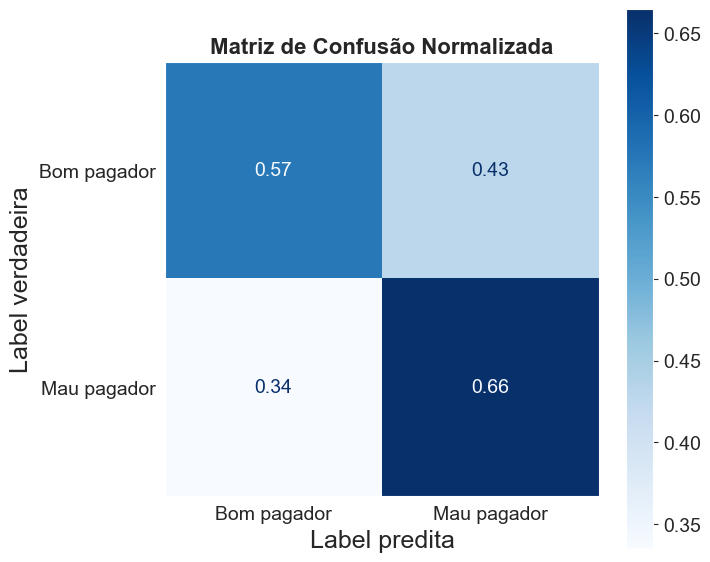


Classification Report
              precision    recall  f1-score   support

           0       0.63      0.57      0.60      4573
           1       0.61      0.66      0.64      4573

    accuracy                           0.62      9146
   macro avg       0.62      0.62      0.62      9146
weighted avg       0.62      0.62      0.62      9146


Roc Curve


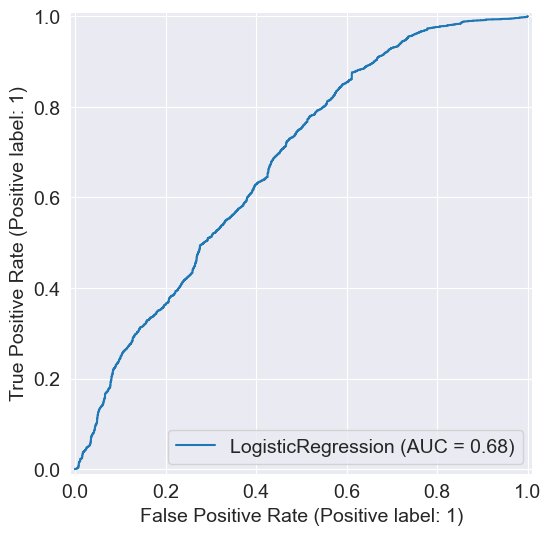

In [85]:
from sklearn.linear_model import LogisticRegression
modelo_logistico = LogisticRegression()
roda_modelo(modelo_logistico)


------------------------------Resultados DecisionTreeClassifier()------------------------------

AUC 0.609265711150585
Métrica KS: KstestResult(statistic=0.19779138421167725, pvalue=7.722068161480963e-157, statistic_location=0.9166666666666666, statistic_sign=1)

Confusion Matrix


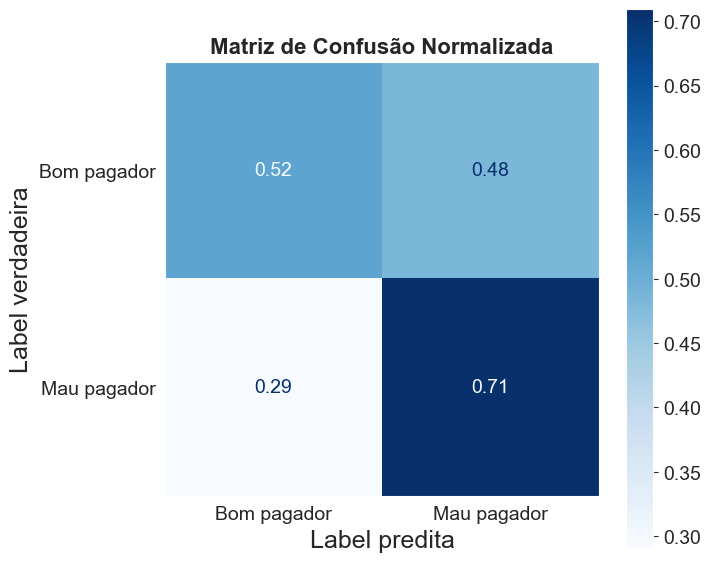


Classification Report
              precision    recall  f1-score   support

           0       0.64      0.52      0.57      4573
           1       0.59      0.71      0.65      4573

    accuracy                           0.61      9146
   macro avg       0.62      0.61      0.61      9146
weighted avg       0.62      0.61      0.61      9146


Roc Curve


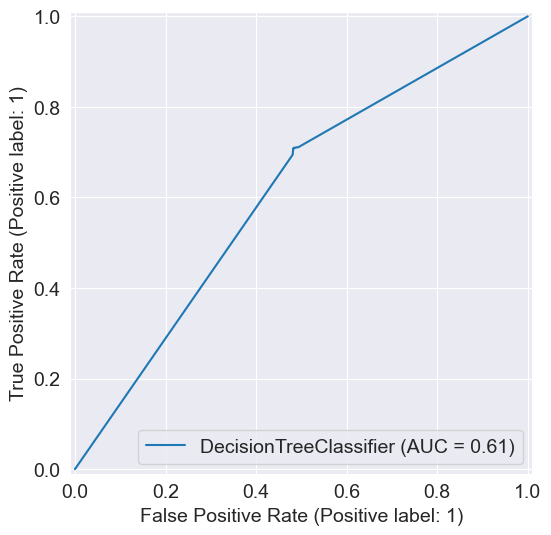

In [86]:
from sklearn.tree import DecisionTreeClassifier
modelo_tree = DecisionTreeClassifier()
roda_modelo(modelo_tree)


------------------------------Resultados RandomForestClassifier()------------------------------

AUC 0.8594882234303027
Métrica KS: KstestResult(statistic=0.4404111086813908, pvalue=0.0, statistic_location=0.53, statistic_sign=-1)

Confusion Matrix


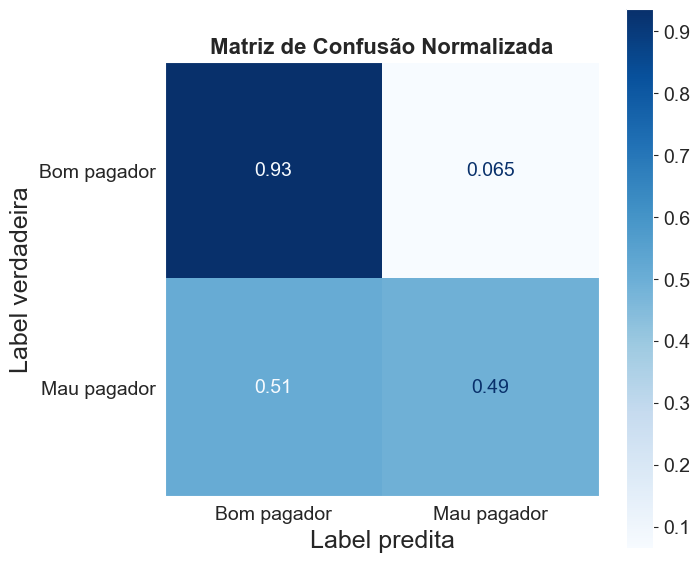


Classification Report
              precision    recall  f1-score   support

           0       0.65      0.93      0.77      4573
           1       0.88      0.49      0.63      4573

    accuracy                           0.71      9146
   macro avg       0.77      0.71      0.70      9146
weighted avg       0.77      0.71      0.70      9146


Roc Curve


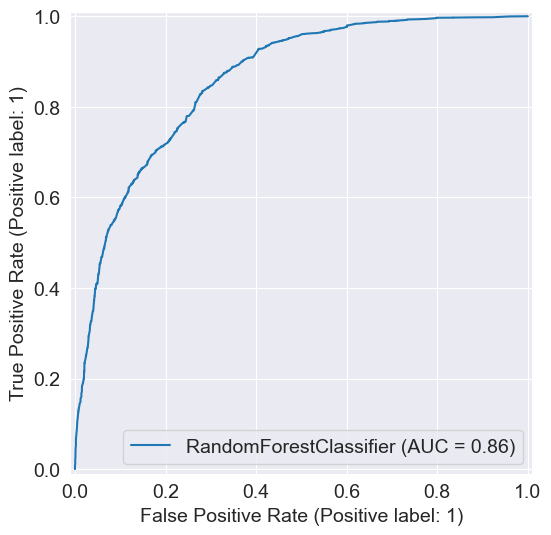

In [87]:
from sklearn.ensemble import RandomForestClassifier
modelo_forest = RandomForestClassifier()
roda_modelo(modelo_forest)


------------------------------Resultados GradientBoostingClassifier()------------------------------

AUC 0.8256123935311079
Métrica KS: KstestResult(statistic=0.5280997157227203, pvalue=0.0, statistic_location=0.49542330334683027, statistic_sign=1)

Confusion Matrix


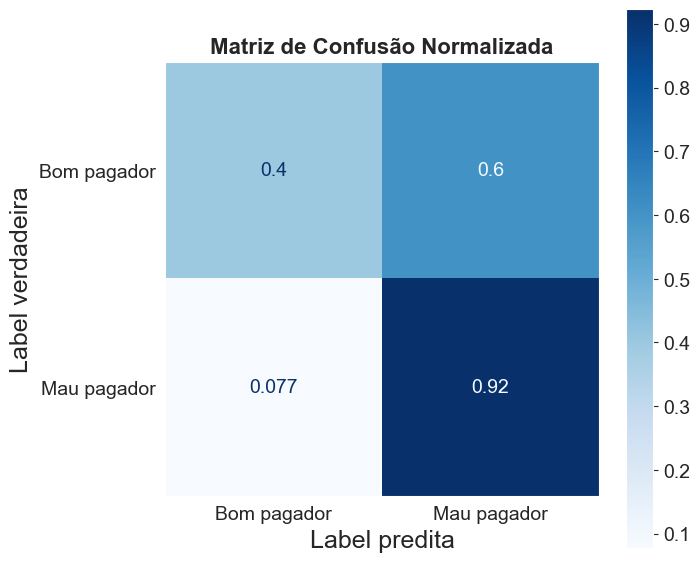


Classification Report
              precision    recall  f1-score   support

           0       0.84      0.40      0.54      4573
           1       0.60      0.92      0.73      4573

    accuracy                           0.66      9146
   macro avg       0.72      0.66      0.63      9146
weighted avg       0.72      0.66      0.63      9146


Roc Curve


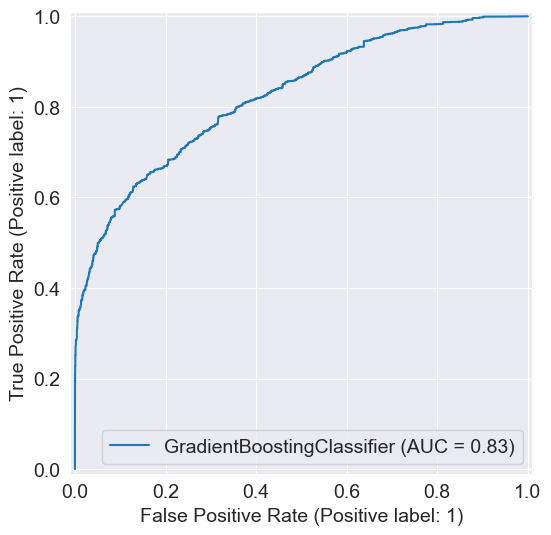

In [88]:

from sklearn.ensemble import GradientBoostingClassifier
modelo_xgb = GradientBoostingClassifier()
roda_modelo(modelo_xgb)



------------------------------Resultados RandomForestClassifier()------------------------------

AUC 0.8569510120082752
Métrica KS: KstestResult(statistic=0.4506888257161601, pvalue=0.0, statistic_location=0.4910356506238859, statistic_sign=-1)

Confusion Matrix


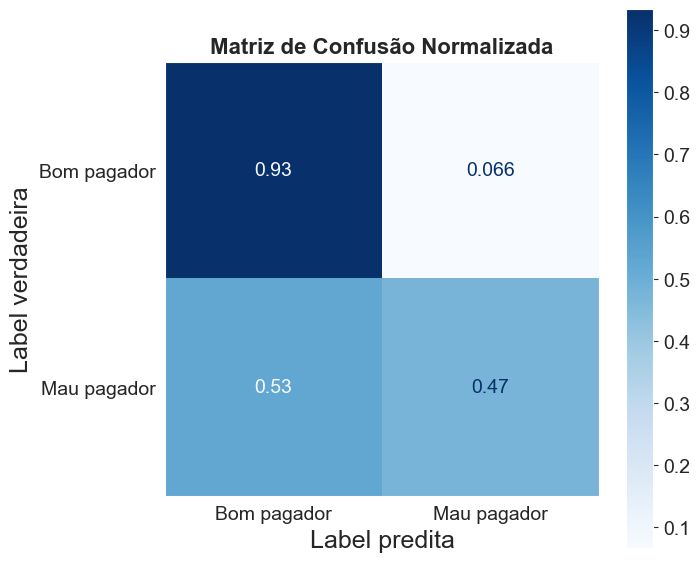


Classification Report
              precision    recall  f1-score   support

           0       0.64      0.93      0.76      4573
           1       0.88      0.47      0.62      4573

    accuracy                           0.70      9146
   macro avg       0.76      0.70      0.69      9146
weighted avg       0.76      0.70      0.69      9146


Roc Curve

------------------------------Resultados AdaBoostClassifier()------------------------------

AUC 0.7525395904014326
Métrica KS: KstestResult(statistic=0.47791384211677235, pvalue=0.0, statistic_location=0.4981200172440146, statistic_sign=1)

Confusion Matrix


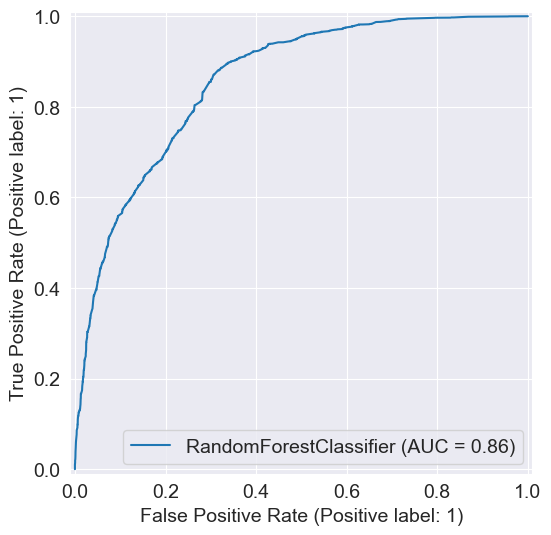

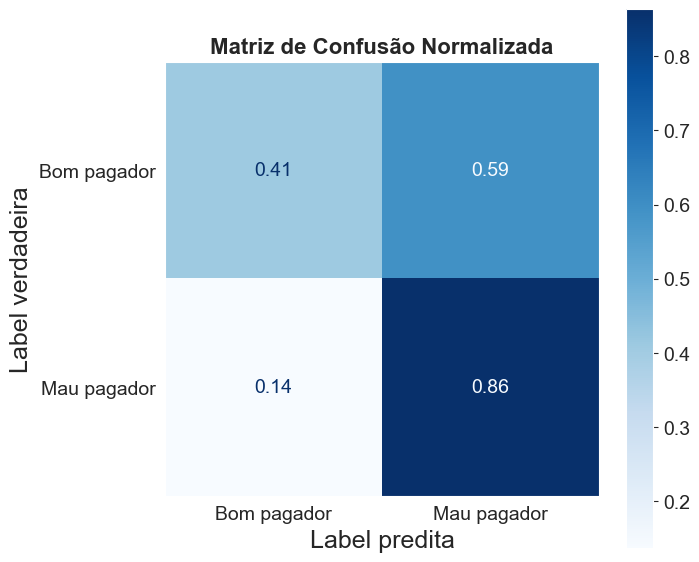


Classification Report
              precision    recall  f1-score   support

           0       0.75      0.41      0.53      4573
           1       0.59      0.86      0.70      4573

    accuracy                           0.64      9146
   macro avg       0.67      0.64      0.62      9146
weighted avg       0.67      0.64      0.62      9146


Roc Curve

------------------------------Resultados LogisticRegression()------------------------------

AUC 0.6756859793091434
Métrica KS: KstestResult(statistic=0.12125519352722501, pvalue=5.752248036227657e-59, statistic_location=0.449778960573576, statistic_sign=1)

Confusion Matrix


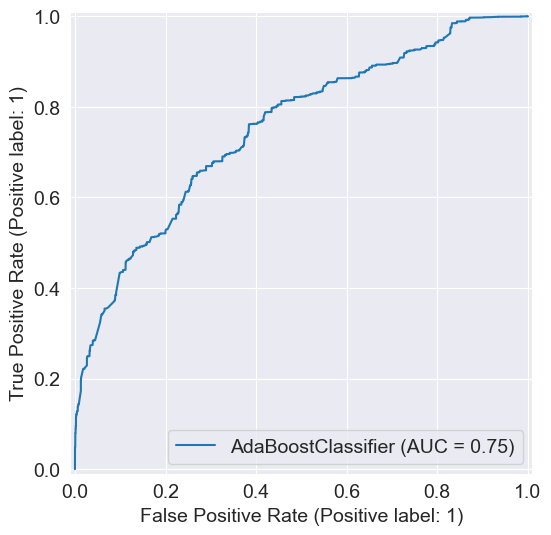

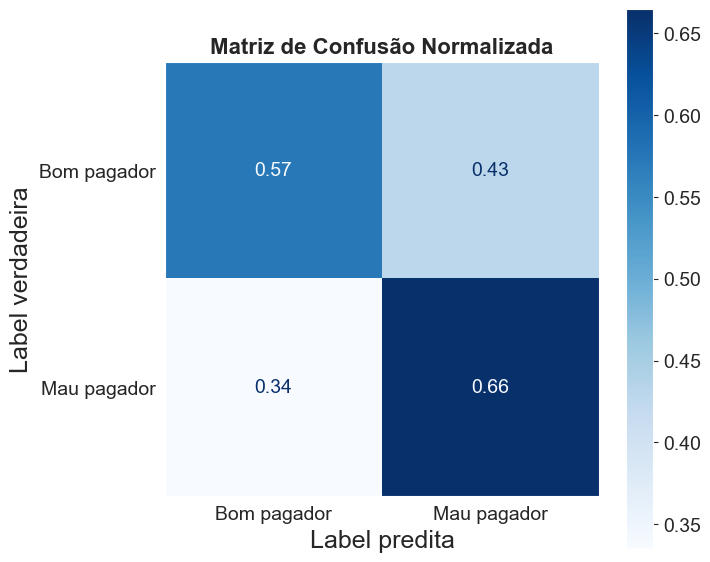


Classification Report
              precision    recall  f1-score   support

           0       0.63      0.57      0.60      4573
           1       0.61      0.66      0.64      4573

    accuracy                           0.62      9146
   macro avg       0.62      0.62      0.62      9146
weighted avg       0.62      0.62      0.62      9146


Roc Curve


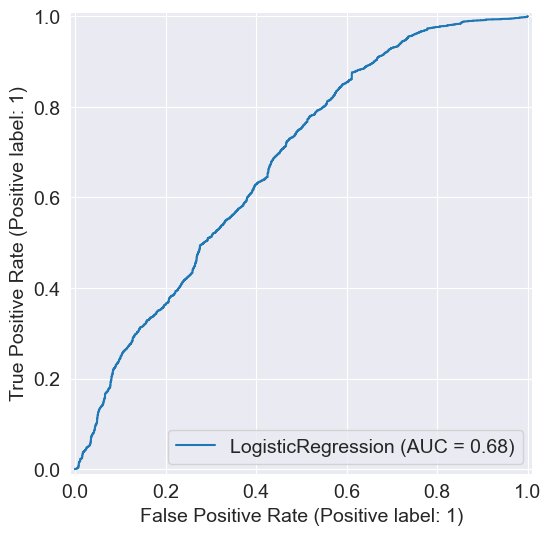

In [89]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Create instances of the models
modelo_rf = RandomForestClassifier()
modelo_adb = AdaBoostClassifier()
modelo_lr = LogisticRegression()
modelo_svc = SVC(probability=True)  # Ensure probability is True for ROC and AUC
modelo_knn = KNeighborsClassifier()
modelo_nb = GaussianNB()

# Example of using these models
roda_modelo(modelo_rf)
roda_modelo(modelo_adb)
roda_modelo(modelo_lr)


------------------------------Resultados SVC(probability=True)------------------------------

AUC 0.8592660100173443
Métrica KS: KstestResult(statistic=0.1717690793789635, pvalue=3.3907769126507847e-118, statistic_location=0.10791568431234197, statistic_sign=-1)

Confusion Matrix


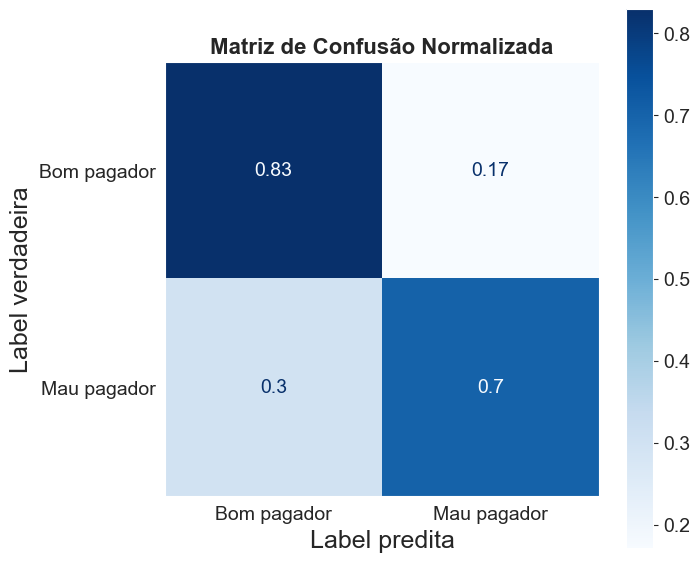


Classification Report
              precision    recall  f1-score   support

           0       0.74      0.83      0.78      4573
           1       0.80      0.70      0.75      4573

    accuracy                           0.77      9146
   macro avg       0.77      0.77      0.76      9146
weighted avg       0.77      0.77      0.76      9146


Roc Curve

------------------------------Resultados KNeighborsClassifier()------------------------------

AUC 0.7413985070720722
Métrica KS: KstestResult(statistic=0.41143669363656243, pvalue=0.0, statistic_location=0.2, statistic_sign=-1)

Confusion Matrix


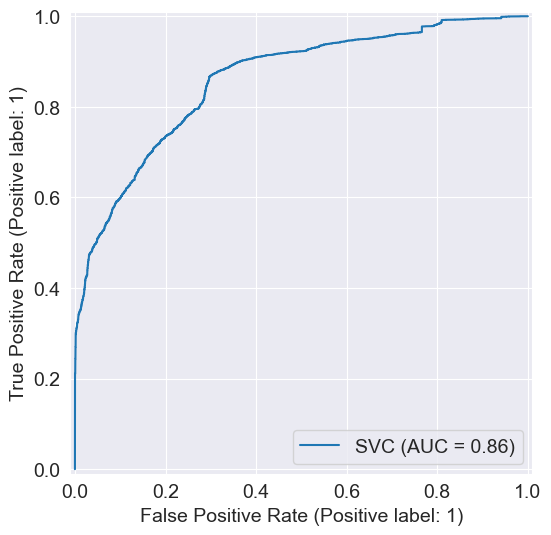

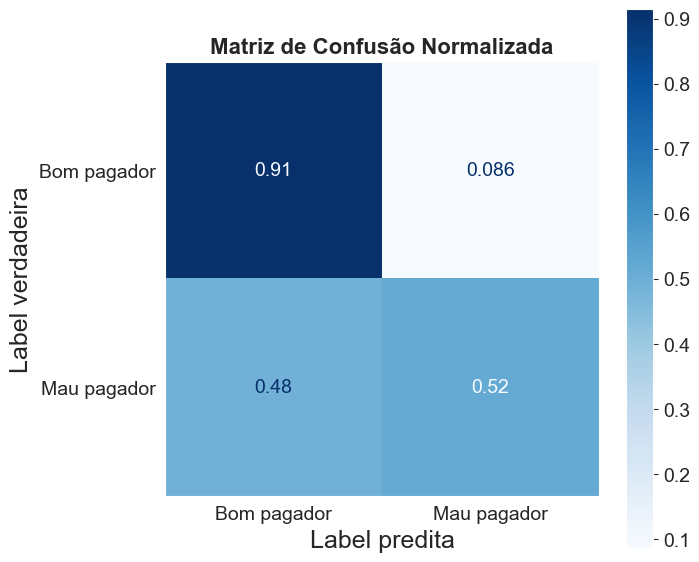


Classification Report
              precision    recall  f1-score   support

           0       0.65      0.91      0.76      4573
           1       0.86      0.52      0.64      4573

    accuracy                           0.71      9146
   macro avg       0.76      0.71      0.70      9146
weighted avg       0.76      0.71      0.70      9146


Roc Curve

------------------------------Resultados GaussianNB()------------------------------

AUC 0.5823173019131442
Métrica KS: KstestResult(statistic=0.8145637437130986, pvalue=0.0, statistic_location=0.03465970704650559, statistic_sign=1)

Confusion Matrix


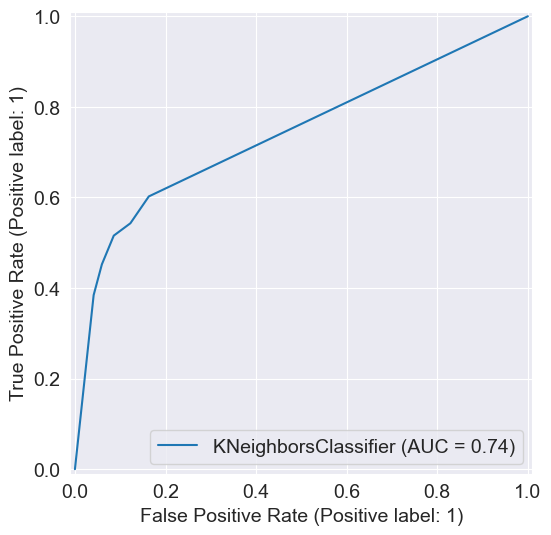

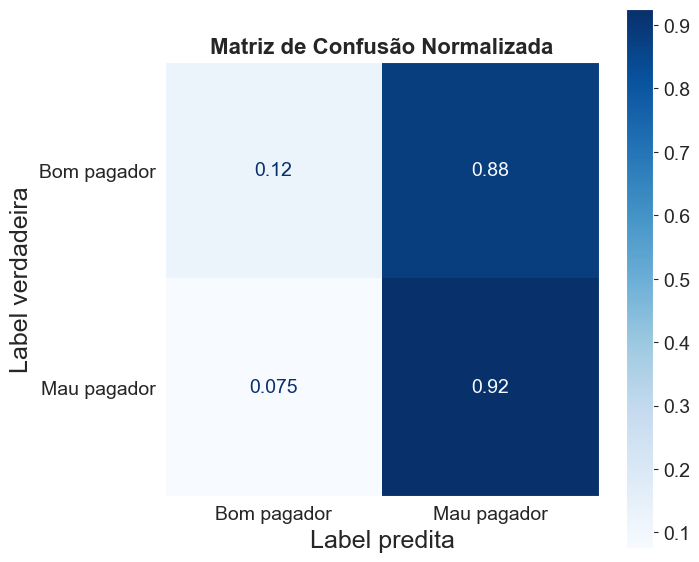


Classification Report
              precision    recall  f1-score   support

           0       0.61      0.12      0.20      4573
           1       0.51      0.92      0.66      4573

    accuracy                           0.52      9146
   macro avg       0.56      0.52      0.43      9146
weighted avg       0.56      0.52      0.43      9146


Roc Curve


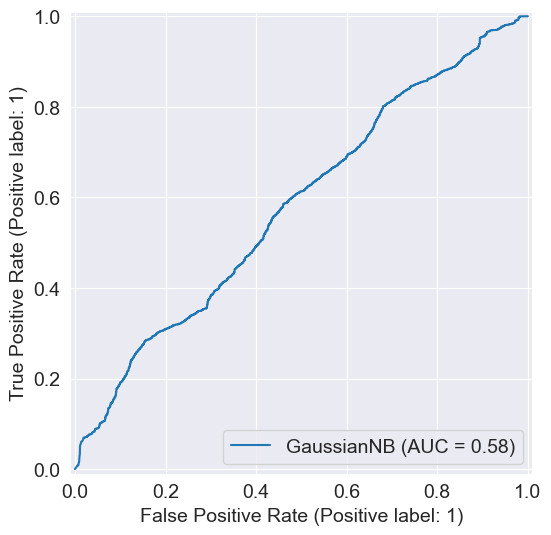

In [90]:
roda_modelo(modelo_svc)
roda_modelo(modelo_knn)
roda_modelo(modelo_nb)

### EXPORTING THE MODEL

In [91]:
import joblib 

In [92]:
joblib.dump(modelo_xgb, 'xgb.joblib')


['xgb.joblib']